# Outline
* Obspy intro
    * Stream
        * Select
        * Index
    * traces
        * stats
    * UTCDateTime
    * Clients (USGS)



# Obspy Intro

In [11]:
import obspy
from obspy import UTCDateTime

sampleData = obspy.read()

# Data Manipulation

In [ ]:
filtered_stream = st.filter('bandpass', freqmin=0.1, freqmax=20)
filtered_stream.plot()

# Client for earthquake catalog

In [1]:
from obspy.clients.fdsn.header import URL_MAPPINGS
for key in sorted(URL_MAPPINGS.keys()):
    print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))

AUSPASS     http://auspass.edu.au
BGR         http://eida.bgr.de
EIDA        http://eida-federator.ethz.ch
EMSC        http://www.seismicportal.eu
ETH         http://eida.ethz.ch
GEOFON      http://geofon.gfz-potsdam.de
GEONET      http://service.geonet.org.nz
GFZ         http://geofon.gfz-potsdam.de
ICGC        http://ws.icgc.cat
IESDMC      http://batsws.earth.sinica.edu.tw
INGV        http://webservices.ingv.it
IPGP        http://ws.ipgp.fr
IRIS        http://service.iris.edu
IRISPH5     http://service.iris.edu
ISC         http://www.isc.ac.uk
KNMI        http://rdsa.knmi.nl
KOERI       http://eida.koeri.boun.edu.tr
LMU         https://erde.geophysik.uni-muenchen.de
NCEDC       https://service.ncedc.org
NIEP        http://eida-sc3.infp.ro
NOA         http://eida.gein.noa.gr
ODC         http://www.orfeus-eu.org
ORFEUS      http://www.orfeus-eu.org
RASPISHAKE  https://data.raspberryshake.org
RESIF       http://ws.resif.fr
RESIFPH5    http://ph5ws.resif.fr
SCEDC       http://service.sc

In [2]:
#Create a Client class instance for IRIS
from obspy.clients.fdsn import Client
from obspy import UTCDateTime


irisClient = Client("ISC")

In [3]:
minLatitude = 35
maxLatitude = 40

minLongitude = -95
MaxLongitude = -87

sTime= UTCDateTime(2000, 1, 1)
eTime = UTCDateTime.now()

events = irisClient.get_events(starttime=sTime, endtime=eTime, 
                               minlatitude=minLatitude, maxlatitude=maxLatitude, 
                               minlongitude=minLongitude, maxlongitude=MaxLongitude)

events

2079 Event(s) in Catalog:
2000-01-11T11:54:54.930000Z | +36.028,  -89.499 | 2.6  MN
2000-01-26T00:21:48.690000Z | +36.222,  -89.392 | 2.8  MN
...
2025-01-03T12:15:41.000000Z | +35.443,  -91.699 | 3.0  M 
2025-02-13T16:38:35.000000Z | +35.696,  -88.740 | 2.6  M 
To see all events call 'print(CatalogObject.__str__(print_all=True))'

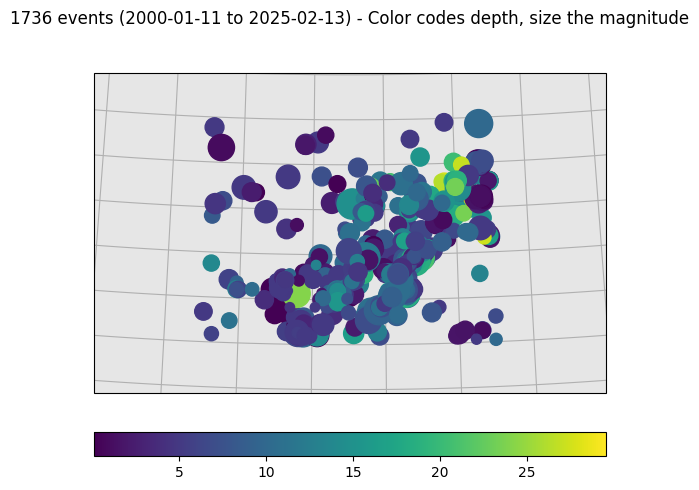

In [10]:
filteredEvents = events.filter("magnitude >= 0.1")
eventPlot = filteredEvents.plot(projection='local', label=None)